# Problem 4.4: PCA: Carry through a PCA on the data of the quasar sample given in Francis & Wills (1999). Compute errors with a bootstrap analysis or jackknife (Section 6.6).
Data:
http://www.astro.ubc.ca/people/jvw/ASTROSTATS/Data/Chap4_2/4point3.dat

When doing this problem I found the following to be of great help:
    
The origin of the example and source of the data by Francis & Wills (1999): 
    https://arxiv.org/pdf/astro-ph/9905079.pdf
    
A tutorial on Principal Component Analysis by Lindsay I Smith (2002):
    http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
    
Principal Component Analysis in 3 Steps by Sebastian Raschka:
    http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
   


In [1]:
import numpy as np
import os
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.chdir('/Users/jacobhamer/Desktop/College Work/Spring 2017/PHYS767/Jacob-Practical-Stats-Exercises/')

In [8]:
data=pandas.read_table('4point3redone.dat', sep='\s+', header=2, index_col=0, skip_footer=9, na_values=('----', '-----'),engine='python')
#Load in the data using pandas functions
data.tail()

,logL1216,alpha,logFWHM/Hbeta,FeII/Hbeta,logEW[OIII],logFWHM[CIII],logEW/Lalpha,logEW[CIV],CIV/Lalpha,logEW[CIII],SiIII/[CIII],NV/Lalpha,1400A/Lalpha
PGName,,,,,,,,,,,,,
1440+356,45.23,2.08,3.161,1.19,1.00,3.192,2.14,1.54,0.21,1.05,0.747,0.141,0.092
1444+407,45.92,1.91,3.394,1.45,0.30,3.479,1.99,1.34,0.21,1.06,0.809,0.335,0.164
1512+370,46.04,1.21,3.833,0.16,1.76,3.546,2.02,2.05,0.75,1.28,0.228,0.182,0.050
1543+489,46.02,2.11,3.193,0.85,0.00,NaN,1.93,1.60,0.44,NaN,NaN,0.398,0.174
1626+554,45.48,1.94,3.652,0.32,0.95,3.631,2.14,1.80,0.39,1.36,0.197,0.217,0.118


In [9]:
nonans=data.dropna() #Drop any object with missing values
normed=data.dropna() #Make a new data frame which will be normalized
for c in nonans.columns:
    normed.loc[:,c]=(nonans.loc[:,c]-nonans[c].mean())/nonans[c].std() 
    #Normalize by subtracting from each value the mean of its column, and dividing by the standard deviation of the column

/Code/Anaconda/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


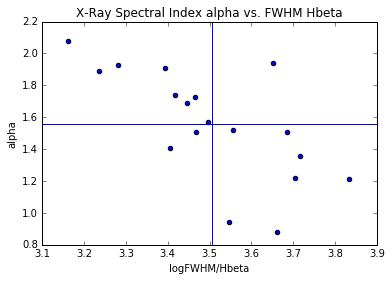

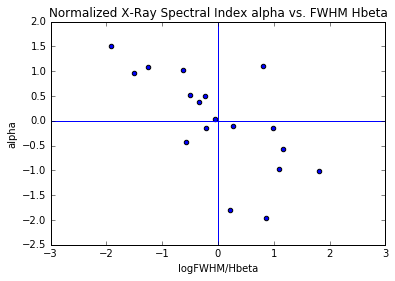

In [10]:
ax1=nonans.plot.scatter(x='logFWHM/Hbeta', y='alpha', title='X-Ray Spectral Index alpha vs. FWHM Hbeta')
ax1.axhline(nonans['alpha'].mean())
ax1.axvline(nonans['logFWHM/Hbeta'].mean())
ax2=normed.plot.scatter(x='logFWHM/Hbeta', y='alpha', title='Normalized X-Ray Spectral Index alpha vs. FWHM Hbeta')
ax2.axhline(normed['alpha'].mean())
ax2.axvline(normed['logFWHM/Hbeta'].mean())

In [11]:
covmat=normed.cov() #Generate a covariance matrix from the normalized data

In [12]:
eigenvals, eigenvectors=np.linalg.eig(covmat) #Get the eigenvalues and eigenvectors of the data
print('eigenvalues: ', eigenvals)

eigenvalues:  [  6.45084295e+00   2.81970758e+00   1.58850005e+00   6.23913328e-01
   5.64812424e-01   3.43465925e-01   2.60773838e-01   1.71915794e-01
   1.22125336e-01   1.93368465e-02   1.66375300e-03   1.02899484e-02
   2.26522347e-02]


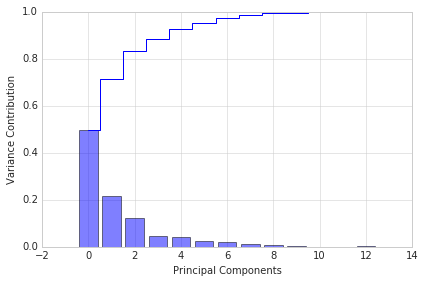

In [13]:
frac=eigenvals/np.sum(eigenvals) #Convert eigenvalues to their fractional value, describing the fraction of the variance each
cumul=np.cumsum(frac)            #principal component contributes

with plt.style.context('seaborn-whitegrid'):
    plt.figure()
    plt.step(range(13), cumul, where='mid', label='cumulative variance contribution')
    plt.bar(range(13), frac, align='center', label='individual variance contribution', alpha=0.5)
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Contribution')
    plt.tight_layout() #Following the style of Raschka's plots

In [14]:
pairs=[(eigenvals[i], eigenvectors[:,i]) for i in range(len(eigenvals))]
#Pairing eigenvalues and vectors
keep=3 #Number of principal components to keep
#I keep 3 for simplicity and as they contain ~80% of the info
projection=np.hstack([(pairs[i][1].reshape(13, 1)) for i in range(keep)])
#Projection matrix which transformed data into new subspace with
#principal components as the basis
print('Projection Matrix:\n', projection)

Projection Matrix:
 [[-0.0545025  -0.53355784  0.12613438]
 [-0.29439293  0.19736188 -0.08176187]
 [ 0.32979982 -0.07675205  0.35693273]
 [-0.34159867  0.1385502  -0.00616331]
 [ 0.31028387 -0.0158019  -0.252419  ]
 [ 0.19758557 -0.07451312  0.62417329]
 [ 0.17651481  0.50274886  0.00480875]
 [ 0.33589694  0.2624232  -0.05089022]
 [ 0.34208709 -0.06370199 -0.03089781]
 [ 0.26104606  0.41377894  0.12428753]
 [-0.34224822  0.14941255  0.01515659]
 [-0.23121919  0.05297502  0.57148226]
 [-0.22324774  0.3513568   0.22543695]]


In [15]:
transformed_data=normed.dot(projection) #Transformed Data = (Normalized Data).(Projection)

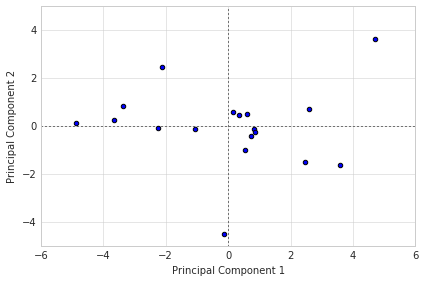

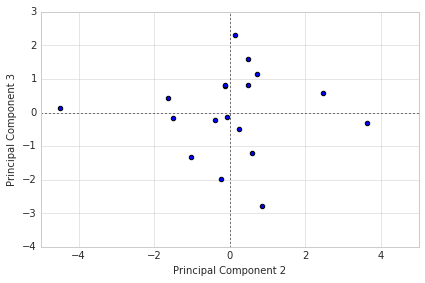

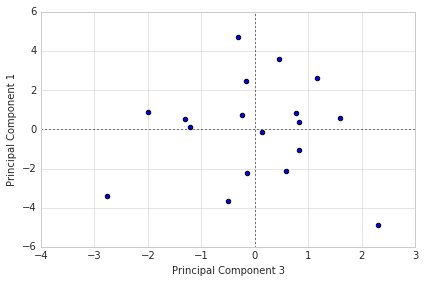

In [16]:
for i in range(3):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure()
        plt.scatter(transformed_data[i], transformed_data[i+1 if i<2 else 0])
        plt.xlabel('Principal Component '+str(i+1))
        plt.ylabel('Principal Component '+str(i+2 if i<2 else 1))
        plt.axhline(0, color='k', linestyle=':')
        plt.axvline(0, color='k', linestyle=':')
        plt.tight_layout()
        plt.show()

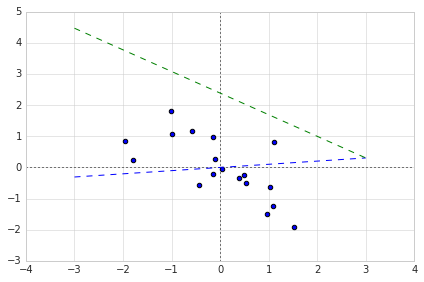

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure()
    plt.scatter(normed['alpha'], normed['logFWHM/Hbeta'])
    plt.axhline(0, color='k', linestyle=':')
    plt.axvline(0, color='k', linestyle=':')
    plt.plot((-3.,3.),(eigenvectors[0][0]/eigenvectors[0][1]*-3.,eigenvectors[0][0]/eigenvectors[0][1]*3.), linestyle='--' )
    plt.plot((-3.,3.),(eigenvectors[1][0]/eigenvectors[1][1]*-3.,eigenvectors[0][0]/eigenvectors[0][1]*3.), linestyle='--' )
    plt.tight_layout()
    plt.show()